In [1]:
import math
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import geojson
from mpas_tools.mesh.creation.signed_distance import mask_from_geojson

In [2]:
lev = xr.open_dataset('/pscratch/sd/a/abhi305/depth_files/hr_depth.nc').refBottomDepth
ds_v = xr.open_dataset('/pscratch/sd/a/abhi305/Regrided_files_111_120_velocityMeridional/mer_v_highres_111_120_re_time_av.nc')
ds_w = xr.open_dataset('/pscratch/sd/a/abhi305/Regrided_files_111_120_vertVelocityTop/vertVelocityTop_111_120_re_time_avg.nc')
ds_pd = xr.open_dataset('/pscratch/sd/a/abhi305/Regrided_files_111_120_potentialDensity/potentialDensity_111_120_re_time_av.nc')

In [7]:
v = ds_v.timeMonthly_avg_velocityMeridional[0,...].values
w = ds_w.timeMonthly_avg_vertVelocityTop[0,...].values
pd = ds_pd.timeMonthly_avg_potentialDensity[0,...].values
lat = v_xr.lat.values
lon = v_xr.lon.values

In [6]:
with open('/pscratch/sd/a/abhi305/mask_files/atlantic_mask.geojson') as f:
    fc = geojson.load(f) 
na_mask = mask_from_geojson(fc,lon,lat)   

Mask from geojson
-----------------


In [8]:
v[:,~na_mask] = np.nan
w[:,~na_mask] = np.nan
pd[:,~na_mask] = np.nan

In [31]:
dist_lon = 0.1*111*np.cos(np.deg2rad(lat))*1000 
dist_lat = 11076

In [12]:
v[v == 0] = np.nan
w[w == 0] = np.nan

In [13]:
southern_boundary_lat_index = np.where(~np.isnan(v[0,:,1500]))[0].min()

In [14]:
#southern_boundary_lat_index = np.argmax(~np.isnan(v[0,:,800]))
v_south = v[:,southern_boundary_lat_index,:]

In [23]:
np.nanmax(v_south)

0.14114921

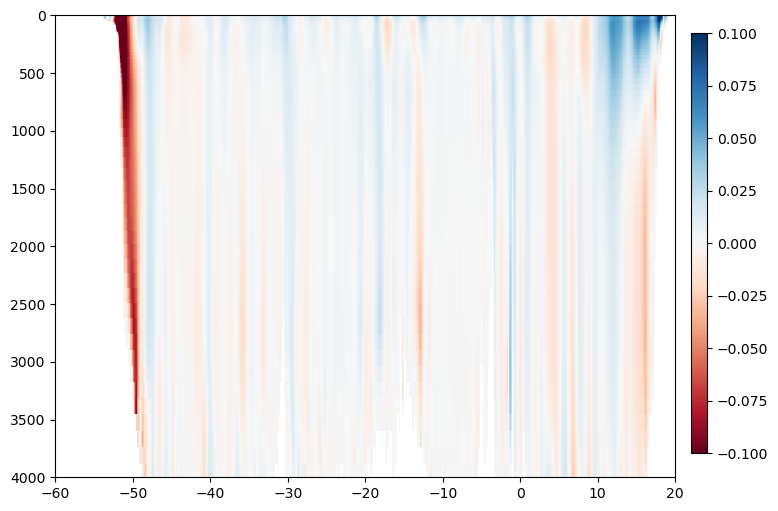

In [26]:
fig,ax=plt.subplots(figsize=(8,6))
c = ax.pcolormesh(lon,lev,v_south,cmap='RdBu',vmin=-0.1,vmax=0.1)
ax.set_xlim(-60,20)
ax.set_ylim(4000,0)
cax = fig.add_axes([0.92,0.15,0.02,0.7])
fig.colorbar(c,cax=cax)

In [27]:
layer_thickness = np.diff(lev, prepend=0)

In [29]:
v_south_dz = v_south * layer_thickness[:,None]

In [33]:
southern_transport_z = np.nansum(v_south_dz,axis=1)*9000

# W

In [68]:
del_w_interior = np.diff(w, axis=0)

In [69]:
del_w_zonal_sum = np.nansum(del_w_interior,axis=2)

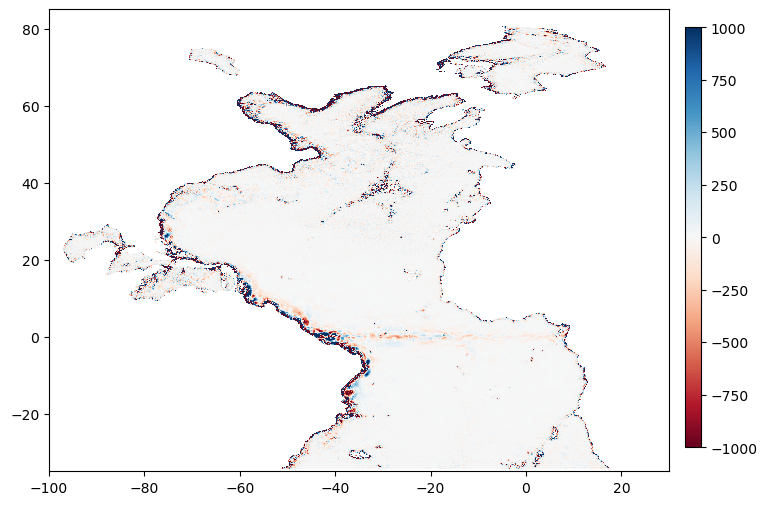

In [56]:
fig,ax=plt.subplots(figsize=(8,6))
c = ax.pcolormesh(lon,lat,del_w_interior_da[50],cmap='RdBu',vmin=-1000,vmax=1000)
ax.set_xlim(-100,30)
ax.set_ylim(-35,85)
cax = fig.add_axes([0.92,0.15,0.02,0.7])
fig.colorbar(c,cax=cax)

In [70]:
del_w_interior_da_zonal_sum_z = del_w_zonal_sum * dist_lon[None,:] * dist_lat

In [39]:
#del_w_interior_da_zonal_sum_z = np.nansum(del_w_interior_da, axis = 2)

In [71]:
interior_transport_z = np.nancumsum(del_w_interior_da_zonal_sum_z, axis=1)

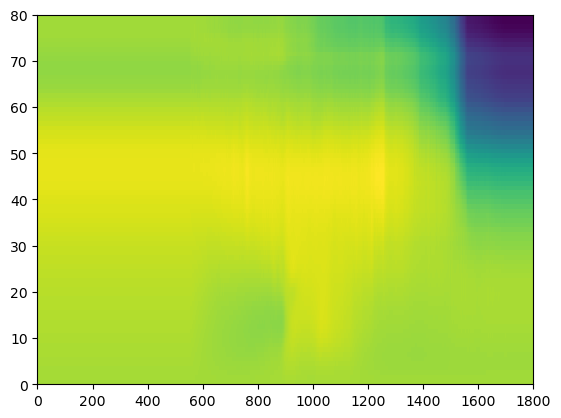

In [72]:
plt.pcolormesh(np.nancumsum(southern_transport_z[:,None]+interior_transport_z,axis=0))

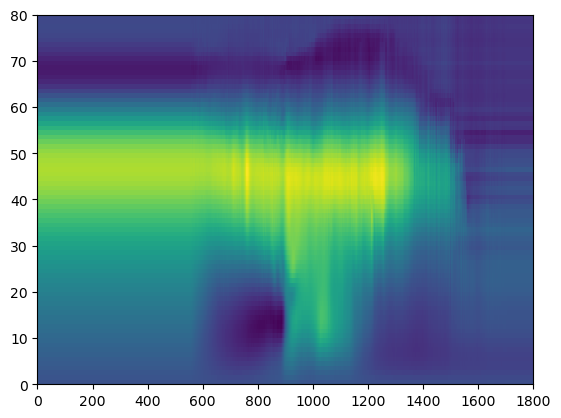

In [67]:
plt.pcolormesh(np.nancumsum(southern_transport_z[:,None]+interior_transport_z,axis=0))

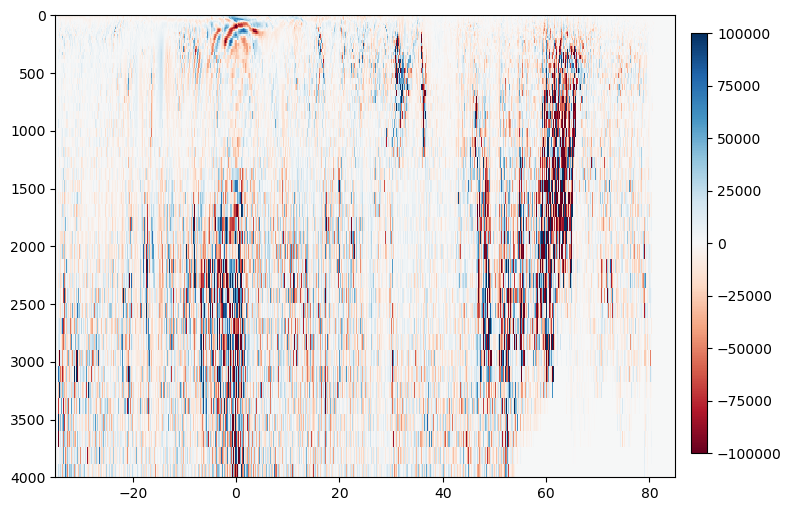

In [59]:
fig,ax=plt.subplots(figsize=(8,6))
c = ax.pcolormesh(lat,lev,del_w_interior_da_zonal_sum_z,cmap='RdBu',vmin=-1e5,vmax=1e5)
ax.set_xlim(-35,85)
ax.set_ylim(4000,0)
cax = fig.add_axes([0.92,0.15,0.02,0.7])
fig.colorbar(c,cax=cax)